### 1. 다중 클래스 분류(Multi-class Classification)

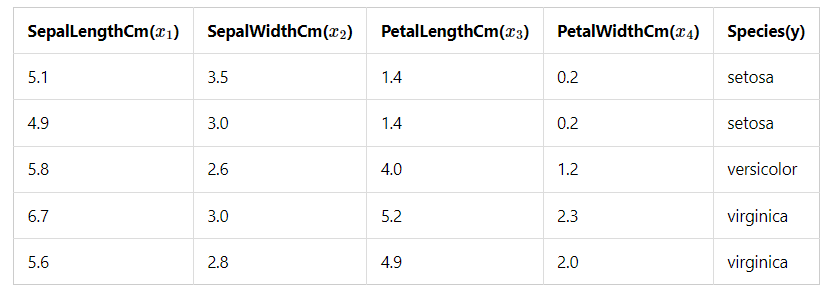

#### 1) 소프트맥스 함수의 이해

K차원의 벡터에서 i번째 원소를 zi, i번째 클래스가 정답일 확률을 pi로 나타낸다고 하였을때, 소프트맥수 함수 Pi는 아래와 같이 정의됩니다.

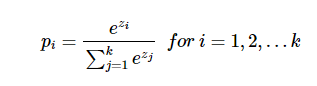

k=3이므로 3차원 벡터를 통해서 식을 적용하면 아래와 같다

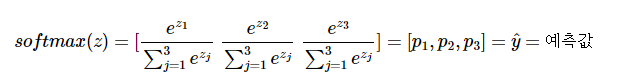

p1 = virginica

p2 = setosa

p3 = versicolor

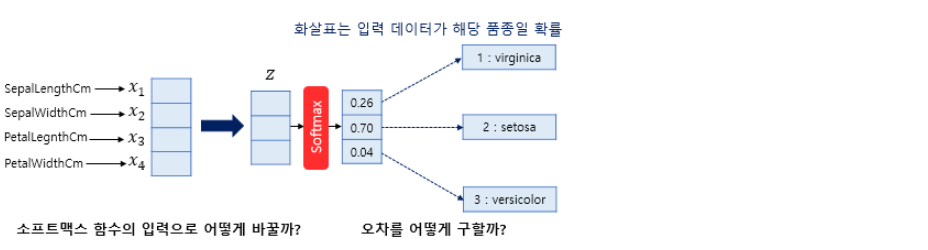

### 더 많은 입력단위가 1개씩 연결되게 되면

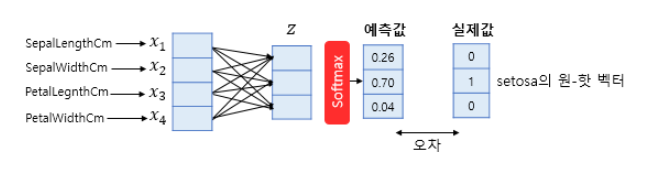

위의 오차를 다시금 업데이트를 하게 됩니다.

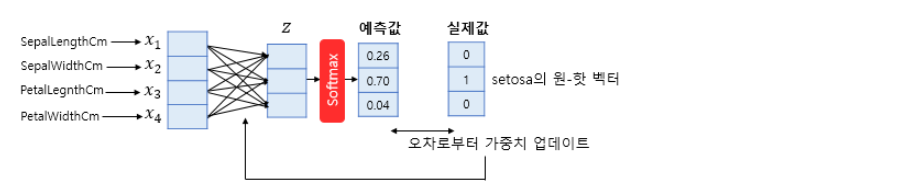

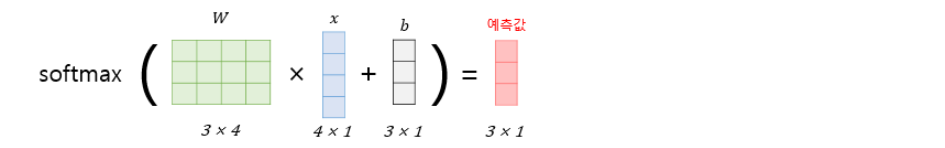

In [21]:
### 소프트맥스 회귀 실습

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

In [22]:
from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical

In [23]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/06.%20Machine%20Learning/dataset/Iris.csv", filename="Iris.csv")

iris_df = pd.read_csv('Iris.csv')

In [24]:
print('데이터의 형태:', iris_df.shape)

데이터의 형태: (150, 6)


In [25]:
# 중복을 제외하고 전체 y값의 데이터 종류를 확인
# y값의 고유값 확인

iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

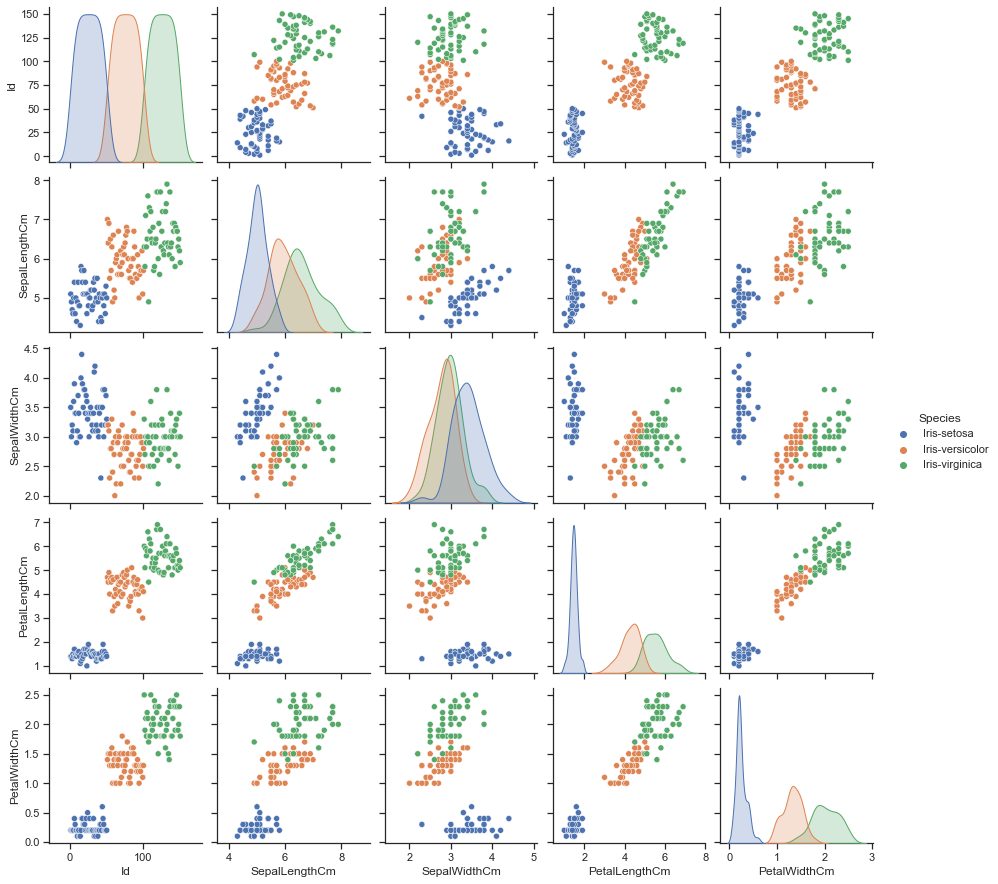

In [26]:
### sns의 pariplot은 각 X 특성에 대해 분포를 scatter 형태로 보여줍니다
### 입력값의 경우에는 DataFrame 입니다.

sns.set(style='ticks', color_codes=True)
graph_pp = sns.pairplot(iris_df, hue="Species")

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

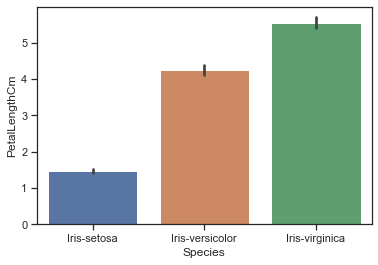

In [27]:
# iris_df.PetalLengthCm
sns.barplot(iris_df.Species,iris_df.PetalLengthCm)

In [28]:
# X_ftr와 y_target을 정의 
X_ftr = iris_df.drop(['Species','Id'], axis=1)
y_target = iris_df['Species']

In [29]:
# X_ftr와 y_target의 shape을 확인
print(X_ftr.shape)
print(y_target.shape)

(150, 4)
(150,)


In [30]:
# train_test_split으로 훈련데이터 vs 테스트데이터 분할
# 8대 2로 분할해보겠습니다.
(X_train, X_test, y_train, y_test) = train_test_split(X_ftr, y_target, test_size=0.2,
                                                      random_state=1)

# 원-핫 인코딩
# y값이 문자형 자료이므로 숫자로 바꿔준다
# 전에는 레이블인코딩만 수행했으므로
# 오늘은 원 핫 인코딩을 pd.get_dummies()가 아닌
# keras 모듈 하의 to_categorical을 활용하여
# 진행한다.

y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

print(y_train[:5])                        
print(y_test[:5])    

[[0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]]
[[1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]]


In [31]:
from re import S
## 딥러닝을 통한 소프트맥스 회귀 구현
# 입력이 4차원이므로 input_dim을 4로 지정합니다.
# 출력이 3차원
# 소프트맥스를 활용할 것이므로 activation = 'softmax'

## 오차함수(loss_function = cost_function)
# 이진분류의 경우에는 'binary_crossentropy'
# 다중분류의 경우에는 'categorical_crossentropy'

## optimizer 최적화 방법 :: adam - 경사하강법의 일종 

## epochs = 200

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델설계
model = Sequential()
model.add(Dense(3, input_dim=4, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

# 모델학습 
history = model.fit(X_train, y_train, epochs=150, batch_size=1, validation_data=(X_test, y_test))

AlreadyExistsError: Another metric with the same name already exists.

In [ ]:
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss']) # 가로축인 x는 epochs, 세로축인 y는 loss
plt.plot(epochs, history.history['val_loss']) # 가로축인 x는 epochs, 세로축인 y는 val_loss

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [ ]:
# evaluate 케라스에서 제공하는 테스트 데이터의 정확도를 측정토록 하는 함수
print("\n 테스트 정확도: %.4f"% (model.evaluate(X_test,y_test)[1]))

In [ ]:
# end of files